<a href="https://colab.research.google.com/github/Cuonn/Communicating-perceiving-and-acting-Perception-and-Robotics/blob/main/APF_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a program that use the APF (Artificial Potential Field) algorithm to control the robot go to the goal and avoid obstacles


Step 1: Using APF Algorithm to find the robot's trajectory

In [13]:
import math

def calculate_distance(point1, point2):
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

# A function that calculate the attractive potential
def cal_attractive_potential(attractive_gain, target, current_position):
    attractive_potential = [attractive_gain * (current_position[0] - target[0]) ,
                            attractive_gain * (current_position[1] - target[1]) ]
    return attractive_potential
# end def

# A function that calulate repulsive potential
def cal_repulsive_potential(repulsive_gain, obstacle_position, obstacle_radius, current_position):
    repulsive_potential = [0, 0]
    for obstacle in obstacle_position:
        # Distance vector from robot to obstacle
        dist = [current_position[0] - obstacle[0],
                current_position[1] - obstacle[1]]

    # Calculate the distance to the obstacle
        norm = math.sqrt(dist[0]** 2 + dist[1]** 2)
        # check if the robot is near the obstacle
        if norm <= obstacle_radius:
            repulsive_potential[0] += repulsive_gain * (1 / obstacle_radius - 1 / norm) * (1 / norm** 2) * (dist[0]/ norm)
            repulsive_potential[1] += repulsive_gain * (1 / obstacle_radius - 1 / norm) * (1 / norm** 2) * (dist[1]/ norm)
        # end if
    #end for
    return repulsive_potential

#end def

# A function that calculate the total potential field
def cal_total_potential_field(current_position, target, obstacle_position, obstacle_radius, repulsive_gain, attractive_gain):
    # calculate attractive potential
    attractive_potential = cal_attractive_potential(attractive_gain, target, current_position)

    # calculate repulsive potential
    repulsive_potential = cal_repulsive_potential(repulsive_gain, obstacle_position, obstacle_radius, current_position)

    #calculate total potential
    total_potential = [-(attractive_potential[0]+ repulsive_potential[0]),
                       -(attractive_potential[1]+ repulsive_potential[1])]

    return total_potential
#end def

# A function to move the robot
def moveRobot (current_position, target, obstacle_position, obstacle_radius, repulsive_gain, attractive_gain, step_size):
    total_potential = cal_total_potential_field(current_position, target, obstacle_position, obstacle_radius, repulsive_gain, attractive_gain)

    dx = step_size * total_potential[0] / math.sqrt(total_potential[0]** 2 + total_potential[1]** 2)
    dy = step_size * total_potential[1] / math.sqrt(total_potential[0]** 2 + total_potential[1]** 2)

    new_position = [current_position[0] + dx, current_position[1] + dy]
    return new_position
#end def

# main function
current_position = [0.0, 0.0]  # initial position of robot
target = [2.0, 2.0]  # target's position
obstacle_position = [[0.57, 1.28], [0.5, 1.0], [0.75, 1.25], [0.25, 0.1]]  # obstacles' postion
obstacle_radius = 1.0  # Range of the sensor
repulsive_gain = 1.0
attractive_gain = 1.0
step_size = 0.0001
trajectory = [current_position] # generate the trajectory list

while calculate_distance(current_position, target) > 0.05 :
    print("Current position:", current_position)
    new_position = moveRobot(current_position, target, obstacle_position, obstacle_radius, repulsive_gain, attractive_gain, step_size)
    current_position = new_position
    trajectory.append(current_position)

Streaming output truncated to the last 5000 lines.
Current position: [1.4571912606230328, 2.088601469904364]
Current position: [1.4572899544998867, 2.0885853603211433]
Current position: [1.4573886483767406, 2.0885692507379225]
Current position: [1.4574873422535946, 2.088553141154702]
Current position: [1.4575860361304485, 2.088537031571481]
Current position: [1.4576847300073024, 2.0885209219882603]
Current position: [1.4577834238841563, 2.0885048124050396]
Current position: [1.4578821177610102, 2.088488702821819]
Current position: [1.457980811637864, 2.088472593238598]
Current position: [1.458079505514718, 2.0884564836553774]
Current position: [1.458178199391572, 2.0884403740721567]
Current position: [1.4582768932684258, 2.088424264488936]
Current position: [1.4583755871452797, 2.088408154905715]
Current position: [1.4584742810221336, 2.0883920453224945]
Current position: [1.4585729748989875, 2.0883759357392737]
Current position: [1.4586716687758414, 2.088359826156053]
Current position

**Step 2**: Plot the trajectory of the robot

Text(0, 0.5, 'y Axes')

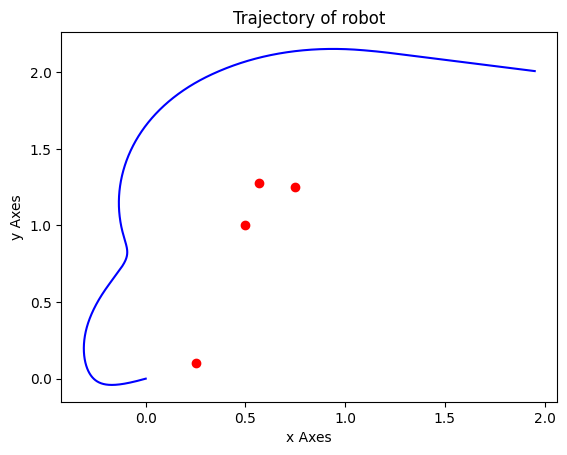

In [14]:
# Plot
import matplotlib.pyplot as plt

# Generate Figure and Axes
fig, ax = plt.subplots()
# Plot obstacles
for obstacle in obstacle_position:
    ax.plot(obstacle[0], obstacle[1], 'ro') # 'ro' is red marker

x_values = [point[0] for point in trajectory]
y_values = [point[1] for point in trajectory]
ax.plot(x_values, y_values, 'b-')

ax.set_title('Trajectory of robot')
ax.set_xlabel('x Axes')
ax.set_ylabel('y Axes')